In [1]:
import numpy as np
import pandas as pd
import vectorbt as vbt
import pandas_ta as ta
import warnings
from datetime import datetime
import time
import plotly.figure_factory as ff
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

In [2]:
symbols = ['USDJPY=X']
start_date = '1996-10-30'
end_date = '2001-10-30'
price = vbt.YFData.download(symbols,start=start_date,end=end_date,internval='1D',missing_index='drop')


In [5]:
price.data[symbols[0]]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-10-30 00:00:00+00:00,114.370003,114.480003,113.610001,114.180000,0,0,0
1996-11-01 00:00:00+00:00,113.500000,113.500000,113.500000,113.500000,0,0,0
1996-11-04 00:00:00+00:00,113.279999,113.980003,112.949997,113.879997,0,0,0
1996-11-05 00:00:00+00:00,113.709999,114.330002,113.449997,114.250000,0,0,0
1996-11-06 00:00:00+00:00,114.230003,114.680000,113.650002,113.949997,0,0,0
...,...,...,...,...,...,...,...
2001-10-22 23:00:00+00:00,122.339996,123.019997,122.199997,122.510002,0,0,0
2001-10-23 23:00:00+00:00,122.540001,122.959999,122.279999,122.809998,0,0,0
2001-10-24 23:00:00+00:00,122.800003,123.349998,122.410004,122.879997,0,0,0


In [6]:
price = price.loc[(price.wrapper.index >= start_date) & (price.wrapper.index < end_date)] #find out for what??

In [7]:
price.data[symbols[0]]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-10-30 00:00:00+00:00,114.370003,114.480003,113.610001,114.180000,0,0,0
1996-11-01 00:00:00+00:00,113.500000,113.500000,113.500000,113.500000,0,0,0
1996-11-04 00:00:00+00:00,113.279999,113.980003,112.949997,113.879997,0,0,0
1996-11-05 00:00:00+00:00,113.709999,114.330002,113.449997,114.250000,0,0,0
1996-11-06 00:00:00+00:00,114.230003,114.680000,113.650002,113.949997,0,0,0
...,...,...,...,...,...,...,...
2001-10-22 23:00:00+00:00,122.339996,123.019997,122.199997,122.510002,0,0,0
2001-10-23 23:00:00+00:00,122.540001,122.959999,122.279999,122.809998,0,0,0
2001-10-24 23:00:00+00:00,122.800003,123.349998,122.410004,122.879997,0,0,0


In [8]:
df = pd.DataFrame()
df = price.data[symbols[0]]
df.drop(['Volume','Dividends','Stock Splits'],axis=1,inplace=True)

In [9]:
df.tail()

,Open,High,Low,Close
Date,,,,
2001-10-22 23:00:00+00:00,122.339996,123.019997,122.199997,122.510002
2001-10-23 23:00:00+00:00,122.540001,122.959999,122.279999,122.809998
2001-10-24 23:00:00+00:00,122.800003,123.349998,122.410004,122.879997
2001-10-25 23:00:00+00:00,122.860001,123.250000,122.379997,122.650002
2001-10-29 00:00:00+00:00,122.760002,122.760002,121.820000,121.889999


In [10]:
df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')

In [11]:
df.head()

,Open,High,Low,Close
Date,,,,
1996-10-30,114.370003,114.480003,113.610001,114.180000
1996-11-01,113.500000,113.500000,113.500000,113.500000
1996-11-04,113.279999,113.980003,112.949997,113.879997
1996-11-05,113.709999,114.330002,113.449997,114.250000
1996-11-06,114.230003,114.680000,113.650002,113.949997


In [12]:
Indicator = pd.DataFrame()
Indicator['short_ma'] = ta.sma(df.Close, length=14)
Indicator['long_ma'] =  ta.sma(df.Close, length=200)

In [13]:
Indicator['short_ma'],Indicator['long_ma']

(Date
 1996-10-30           NaN
 1996-11-01           NaN
 1996-11-04           NaN
 1996-11-05           NaN
 1996-11-06           NaN
                  ...    
 2001-10-22    121.016429
 2001-10-23    121.183571
 2001-10-24    121.355714
 2001-10-25    121.565000
 2001-10-29    121.685714
 Name: short_ma, Length: 1290, dtype: float64,
 Date
 1996-10-30          NaN
 1996-11-01          NaN
 1996-11-04          NaN
 1996-11-05          NaN
 1996-11-06          NaN
                 ...    
 2001-10-22    121.02325
 2001-10-23    121.04145
 2001-10-24    121.06635
 2001-10-25    121.09395
 2001-10-29    121.12110
 Name: long_ma, Length: 1290, dtype: float64)

In [14]:
Indicator['entry_signal'] = Indicator.short_ma>Indicator.long_ma
Indicator['exit_signal'] = Indicator.short_ma<Indicator.long_ma

In [15]:
Indicator['entry_signal'],Indicator['exit_signal']

(Date
 1996-10-30    False
 1996-11-01    False
 1996-11-04    False
 1996-11-05    False
 1996-11-06    False
               ...  
 2001-10-22    False
 2001-10-23     True
 2001-10-24     True
 2001-10-25     True
 2001-10-29     True
 Name: entry_signal, Length: 1290, dtype: bool,
 Date
 1996-10-30    False
 1996-11-01    False
 1996-11-04    False
 1996-11-05    False
 1996-11-06    False
               ...  
 2001-10-22     True
 2001-10-23    False
 2001-10-24    False
 2001-10-25    False
 2001-10-29    False
 Name: exit_signal, Length: 1290, dtype: bool)

In [16]:
Indicator[Indicator.entry_signal==True]

,short_ma,long_ma,entry_signal,exit_signal
Date,,,,
1997-08-31,118.207143,118.18525,True,False
1997-09-01,118.646429,118.23530,True,False
1997-09-02,118.835715,118.28270,True,False
1997-09-03,119.107143,118.33155,True,False
1997-09-04,119.322857,118.38050,True,False
...,...,...,...,...
2001-08-30,120.086429,119.85970,True,False
2001-10-23,121.183571,121.04145,True,False
2001-10-24,121.355714,121.06635,True,False


In [19]:
Indicator.entry_signal = Indicator.entry_signal.shift(1)
Indicator.exit_signal = Indicator.exit_signal.shift(1)
Indicator.head(),Indicator.tail()

(            short_ma  long_ma entry_signal exit_signal
 Date                                                  
 1996-10-30       NaN      NaN          NaN         NaN
 1996-11-01       NaN      NaN        False       False
 1996-11-04       NaN      NaN        False       False
 1996-11-05       NaN      NaN        False       False
 1996-11-06       NaN      NaN        False       False,
               short_ma    long_ma entry_signal exit_signal
 Date                                                      
 2001-10-22  121.016429  121.02325        False        True
 2001-10-23  121.183571  121.04145        False        True
 2001-10-24  121.355714  121.06635         True       False
 2001-10-25  121.565000  121.09395         True       False
 2001-10-29  121.685714  121.12110         True       False)

In [20]:
Indicator.entry_signal.fillna(False,inplace=True)
Indicator.exit_signal.fillna(False,inplace=True)

In [21]:
Indicator.head()

,short_ma,long_ma,entry_signal,exit_signal
Date,,,,
1996-10-30,NaN,NaN,False,False
1996-11-01,NaN,NaN,False,False
1996-11-04,NaN,NaN,False,False
1996-11-05,NaN,NaN,False,False
1996-11-06,NaN,NaN,False,False


In [22]:
long_signal_vectorbt = ta.tsignals(Indicator.entry_signal,asbool=True,append=True)
short_signal_vectorbt = ta.tsignals(Indicator.exit_signal,asbool=True,append=True)
long_signal_vectorbt,short_signal_vectorbt

(            TS_Trends  TS_Trades  TS_Entries  TS_Exits
 Date                                                  
 1996-10-30      False          0       False     False
 1996-11-01      False          0       False     False
 1996-11-04      False          0       False     False
 1996-11-05      False          0       False     False
 1996-11-06      False          0       False     False
 ...               ...        ...         ...       ...
 2001-10-22      False          0       False     False
 2001-10-23      False          0       False     False
 2001-10-24       True          1        True     False
 2001-10-25       True          0       False     False
 2001-10-29       True          0       False     False
 
 [1290 rows x 4 columns],
             TS_Trends  TS_Trades  TS_Entries  TS_Exits
 Date                                                  
 1996-10-30      False          0       False     False
 1996-11-01      False          0       False     False
 1996-11-04      Fal

In [23]:
#Data is same. But is it correct or not?
long_signal_vectorbt[long_signal_vectorbt.TS_Entries==True],short_signal_vectorbt[short_signal_vectorbt.TS_Exits==True]

(            TS_Trends  TS_Trades  TS_Entries  TS_Exits
 Date                                                  
 1997-09-01       True          1        True     False
 1998-10-01       True          1        True     False
 1999-05-20       True          1        True     False
 2000-03-01       True          1        True     False
 2000-05-07       True          1        True     False
 2000-07-11       True          1        True     False
 2000-09-27       True          1        True     False
 2001-10-24       True          1        True     False,
             TS_Trends  TS_Trades  TS_Entries  TS_Exits
 Date                                                  
 1997-09-01      False         -1       False      True
 1998-10-01      False         -1       False      True
 1999-05-20      False         -1       False      True
 2000-03-01      False         -1       False      True
 2000-05-07      False         -1       False      True
 2000-07-11      False         -1       False  

In [24]:
#Data is not same. So Why? "1997-08-26" is correct or not?
long_signal_vectorbt[long_signal_vectorbt.TS_Exits==True],short_signal_vectorbt[short_signal_vectorbt.TS_Entries==True]

(            TS_Trends  TS_Trades  TS_Entries  TS_Exits
 Date                                                  
 1998-09-17      False         -1       False      True
 1998-10-06      False         -1       False      True
 1999-07-29      False         -1       False      True
 2000-03-02      False         -1       False      True
 2000-06-25      False         -1       False      True
 2000-09-10      False         -1       False      True
 2001-09-03      False         -1       False      True,
             TS_Trends  TS_Trades  TS_Entries  TS_Exits
 Date                                                  
 1997-08-25       True          1        True     False
 1998-09-17       True          1        True     False
 1998-10-06       True          1        True     False
 1999-07-29       True          1        True     False
 2000-03-02       True          1        True     False
 2000-06-25       True          1        True     False
 2000-09-10       True          1        True  

Text(0.5, 1.0, 'Close Price')

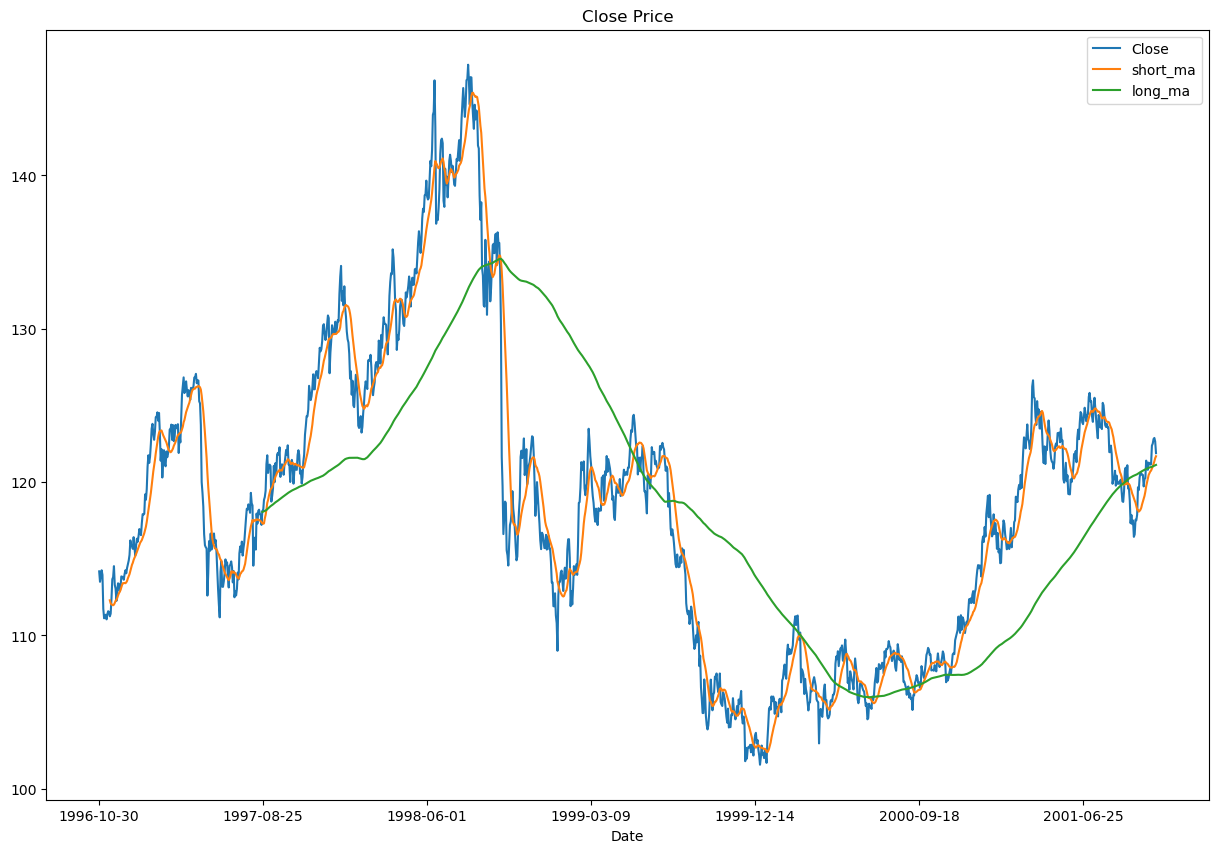

In [25]:
mpl.rcParams['figure.figsize'] = (15.0,10.0)
Indicator['Close'] = df.Close
Indicator[['Close','short_ma','long_ma']].plot()
plt.title('Close Price')


In [26]:
# it is 1st time that "short ma"<"long ma" -> True
Indicator.loc["1997-08-26"]

short_ma        117.308571
long_ma           118.0974
entry_signal         False
exit_signal           True
Close           118.839996
Name: 1997-08-26, dtype: object

# BACK TEST SIMPLE


In [27]:
MA = ta.sma(df.Close, length = 50)
RSI = ta.rsi(df.Close, length = 14)

In [28]:
Entry = df.Close>MA
Exit = RSI>70
Entry,Exit

(Date
 1996-10-30    False
 1996-11-01    False
 1996-11-04    False
 1996-11-05    False
 1996-11-06    False
               ...  
 2001-10-22     True
 2001-10-23     True
 2001-10-24     True
 2001-10-25     True
 2001-10-29     True
 Length: 1290, dtype: bool,
 Date
 1996-10-30    False
 1996-11-01    False
 1996-11-04    False
 1996-11-05    False
 1996-11-06    False
               ...  
 2001-10-22    False
 2001-10-23    False
 2001-10-24    False
 2001-10-25    False
 2001-10-29    False
 Name: RSI_14, Length: 1290, dtype: bool)

In [29]:
Entry = Entry.shift(1)
Exit = Exit.shift(1)
Entry,Exit

(Date
 1996-10-30      NaN
 1996-11-01    False
 1996-11-04    False
 1996-11-05    False
 1996-11-06    False
               ...  
 2001-10-22     True
 2001-10-23     True
 2001-10-24     True
 2001-10-25     True
 2001-10-29     True
 Length: 1290, dtype: object,
 Date
 1996-10-30      NaN
 1996-11-01    False
 1996-11-04    False
 1996-11-05    False
 1996-11-06    False
               ...  
 2001-10-22    False
 2001-10-23    False
 2001-10-24    False
 2001-10-25    False
 2001-10-29    False
 Name: RSI_14, Length: 1290, dtype: object)

In [30]:
Entry.fillna(False,inplace=True)
Exit.fillna(False,inplace=True)
Entry,Exit

(Date
 1996-10-30    False
 1996-11-01    False
 1996-11-04    False
 1996-11-05    False
 1996-11-06    False
               ...  
 2001-10-22     True
 2001-10-23     True
 2001-10-24     True
 2001-10-25     True
 2001-10-29     True
 Length: 1290, dtype: bool,
 Date
 1996-10-30    False
 1996-11-01    False
 1996-11-04    False
 1996-11-05    False
 1996-11-06    False
               ...  
 2001-10-22    False
 2001-10-23    False
 2001-10-24    False
 2001-10-25    False
 2001-10-29    False
 Name: RSI_14, Length: 1290, dtype: bool)

In [31]:
Entry_signal_vectorbt = ta.tsignals(Entry,asbool=True,append=True)
Exit_signal_vectorbt = ta.tsignals(Exit,asbool=True,append=True)
Entry_signal_vectorbt,Exit_signal_vectorbt

(            TS_Trends  TS_Trades  TS_Entries  TS_Exits
 Date                                                  
 1996-10-30      False          0       False     False
 1996-11-01      False          0       False     False
 1996-11-04      False          0       False     False
 1996-11-05      False          0       False     False
 1996-11-06      False          0       False     False
 ...               ...        ...         ...       ...
 2001-10-22       True          0       False     False
 2001-10-23       True          0       False     False
 2001-10-24       True          0       False     False
 2001-10-25       True          0       False     False
 2001-10-29       True          0       False     False
 
 [1290 rows x 4 columns],
             TS_Trends  TS_Trades  TS_Entries  TS_Exits
 Date                                                  
 1996-10-30      False          0       False     False
 1996-11-01      False          0       False     False
 1996-11-04      Fal

In [32]:
df.loc[Entry_signal_vectorbt.TS_Entries== True,'entry_position'] = df.Low*0.98
df.loc[Exit_signal_vectorbt.TS_Entries== True,'exit_position'] = df.High*1.02

In [35]:
#Setting Layout
layout = go.Layout(
    title="Example Dataset 1",
    plot_bgcolor="white",  # Sets background color to white
    legend=dict(
        # Adjust click behavior
        itemclick="toggleothers",
        itemdoubleclick="toggle"),
    
    hovermode = 'x',
    hoverdistance = 100, #Distance to show hover label of data point
    spikedistance = 1000, #Distance to show spike
    
    xaxis=dict(
        title="time",
        linecolor="black",  # Sets color of X-axis line
        showspikes = True, #Show spike line for x-axis
        spikethickness = 2,
        spikedash =  "dot",
        spikecolor = "#999999",
        spikemode = "across",
        showgrid=False  # Removes X-axis grid lines
    ),
    yaxis=dict(
        domain=[0.4,1],
        title="Price",
        linecolor="black",  # Sets color of Y-axis line
        showgrid=False,  # Removes Y-axis grid lines
    ),
    yaxis2=dict(
        domain=[0,0.3],
        anchor="x2",
        title="RSI",
        linecolor="black",  # Sets color of Y-axis line
        showgrid=False,  # Removes Y-axis grid lines 
    ))


data = []
#Candlestick Data
TS = go.Candlestick(x=df.index,
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'],
                    increasing_line_color = 'Green',decreasing_line_color = 'Red')
data.append(TS)


#Indicator Part Lower Part
#RSI
date_generated = pd.date_range(df.index[0], periods=len(df))
rsi = go.Scatter(x=df.Open.index, 
                    y=RSI, 
                    mode='lines', name='RSI',marker=dict(color = 'Red'),opacity=0.5, 
                    yaxis="y2",xaxis='x1')

rsi_l_line = go.Scatter(x=df.index, 
                    y=pd.Series(30, index =date_generated), 
                    mode='lines', name='RSI',marker=dict(color = 'Black'),opacity=0.5, 
                    yaxis="y2",xaxis='x1')

rsi_u_line = go.Scatter(x=df.index, 
                    y=pd.Series(70, index =date_generated), 
                    mode='lines', name='RSI',marker=dict(color = 'Black'),opacity=0.5, 
                    yaxis="y2",xaxis='x1')
data.append(rsi)
data.append(rsi_l_line)
data.append(rsi_u_line)



#Indicator Part Upper Part

SMA = go.Scatter(x=df.index, 
                    y=MA, 
                    mode='lines', name='SMA line',marker=dict(color = 'blue'),opacity=0.5)

data.append(SMA)
 

#Signal Part
Long_Signal = go.Scatter(
                    x=df.index, 
                    y=df.entry_position, 
                    mode='markers', marker_symbol = "triangle-up", marker_size=10,
                    name='long_signal',marker=dict(color = 'green'),opacity=0.5)
Short_Signal = go.Scatter(
                    x=df.index, 
                    y=df.exit_position  , 
                    mode='markers', marker_symbol = "triangle-down", marker_size=10,
                    name='short_signal',marker=dict(color = 'red'),opacity=0.5)
data.append(Long_Signal)
data.append(Short_Signal)



fig = go.Figure(data=data, layout=layout)

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show(config={"displayModeBar": True, "showTips": False}) 

In [57]:
#Setting Layout
layout = go.Layout(
    title="test",
    plot_bgcolor="white",  # Sets background color to white
    legend=dict(
         #Adjust click behavior
        itemclick="toggleothers",
       itemdoubleclick="toggle"),
    
   hovermode = 'x',
   hoverdistance = 100, #Distance to show hover label of data point
   spikedistance = 1000, #Distance to show spike
    
    xaxis=dict(
        title="time",
        linecolor="black",  # Sets color of X-axis line
       showspikes = True, #Show spike line for x-axis
        spikethickness = 2,
        spikedash =  "dot",
        spikecolor = "#999999",
       spikemode = "across",
        showgrid=True  # Removes X-axis grid lines
    ),
    yaxis=dict(
        domain=[0.4,1],
        title="Price",
        linecolor="black",  # Sets color of Y-axis line
        showgrid=False,  # Removes Y-axis grid lines
    ),
    yaxis2=dict(
        domain=[0,0.3],
        anchor="x2",
       title="RSI",
      linecolor="black",  # Sets color of Y-axis line
        showgrid=False,  # Removes Y-axis grid lines 
    )
)


data = []
#Candlestick Data
TS = go.Candlestick(x=df.index,
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'],
                    increasing_line_color = 'Green',decreasing_line_color = 'Red')

#Indicator Part Lower Part
#RSI
date_generated = pd.date_range(df.index[0], periods=len(df))
rsi = go.Scatter(x=df.Open.index, 
                    y=RSI, 
                    mode='lines', name='RSI',marker=dict(color = 'Red'),opacity=0.5, 
                    yaxis="y2",xaxis='x1')

rsi_l_line = go.Scatter(x=df.index, 
                    y=pd.Series(30, index =date_generated), 
                    mode='lines', name='RSI',marker=dict(color = 'Black'),opacity=0.5, 
                    yaxis="y2",xaxis='x1')

rsi_u_line = go.Scatter(x=df.index, 
                    y=pd.Series(70, index =date_generated), 
                    mode='lines', name='RSI',marker=dict(color = 'Black'),opacity=0.5, 
                    yaxis="y2",xaxis='x1')
data.append(rsi)
data.append(rsi_l_line)
data.append(rsi_u_line)
#Indicator Part Upper Part

SMA = go.Scatter(x=df.index, 
                    y=MA, 
                    mode='lines', name='SMA line',marker=dict(color = 'blue'),opacity=0.5)

data.append(SMA)
 

#Signal Part
Long_Signal = go.Scatter(
                    x=df.index, 
                    y=df.entry_position, 
                    mode='markers', marker_symbol = "triangle-up", marker_size=10,
                    name='long_signal',marker=dict(color = 'green'),opacity=0.5)
Short_Signal = go.Scatter(
                    x=df.index, 
                    y=df.exit_position  , 
                    mode='markers', marker_symbol = "triangle-down", marker_size=10,
                    name='short_signal',marker=dict(color = 'red'),opacity=0.5)
data.append(Long_Signal)
data.append(Short_Signal)

data.append(TS)



fig = go.Figure(data=data, layout=layout)

fig.show() 

In [39]:
type(data)

list

In [42]:
data[0]

Candlestick({
    'close': array([114.18000031, 113.5       , 113.87999725, ..., 122.87999725,
                    122.65000153, 121.88999939]),
    'decreasing': {'line': {'color': 'Red'}},
    'high': array([114.48000336, 113.5       , 113.98000336, ..., 123.34999847,
                   123.25      , 122.76000214]),
    'increasing': {'line': {'color': 'Green'}},
    'low': array([113.61000061, 113.5       , 112.94999695, ..., 122.41000366,
                  122.37999725, 121.81999969]),
    'open': array([114.37000275, 113.5       , 113.27999878, ..., 122.80000305,
                   122.86000061, 122.76000214]),
    'x': array(['1996-10-30', '1996-11-01', '1996-11-04', ..., '2001-10-24',
                '2001-10-25', '2001-10-29'], dtype=object)
})